<a href="https://colab.research.google.com/github/shinjeongdong/MLDeeplearningStudy/blob/main/2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [24]:
import numpy as np
fish_data = np.column_stack((fish_length,fish_weight)) #colum_stack = 리스트를 받아 각 리스트의 원소를 일렬로 세움, 리스트 컴프리헨션 대신 쓰면 편함
fish_target = np.concatenate((np.ones(35),np.zeros(14))) # 35개의 1 14개의 0을 생성

In [25]:
print((fish_target))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42) # 랜덤시드 42적용후 랜덤하게 데이터를 분배함

In [28]:
print(train_input.shape,test_input.shape)
print(train_target)
print("-----------------")
print(train_input) #섞인 값 출력

(36, 2) (13, 2)
[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
-----------------
[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]


In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target) #모델 생성
kn.score(test_input,test_target) #테스트

1.0

In [30]:
kn.predict([[25,150]]) #왜 빙어로 나올까....

array([0.])

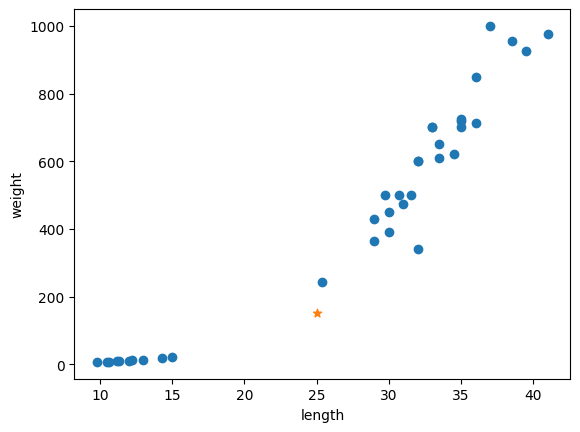

In [31]:
#그래프로 그려보자
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='*') #marker은 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
distances, indexes = kn.kneighbors([[25,150]]) # 25,150 좌표와 가장 가까운 5개의 클래스의 거리와 인덱스를 반환함.
print(distances,indexes)#가장 가까운 거리와 인덱스
print(train_target[indexes]) # 가까운 5개의 데이터중에서 4개가 0이여서 0이 출력이됐다. 대체 why? x와 y의 비율이 다르기 때문이다.

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]
[[1. 0. 0. 0. 0.]]


In [33]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


Text(0, 0.5, 'weight')

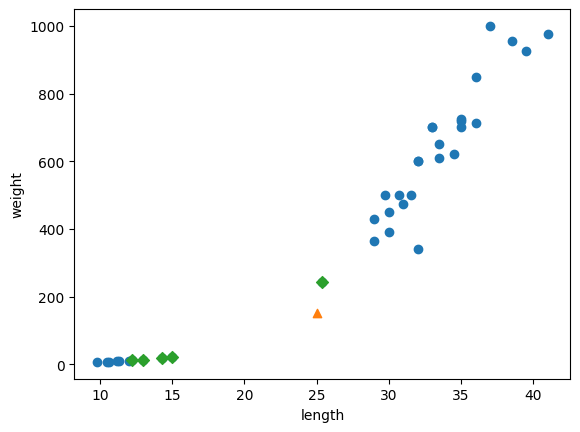

In [34]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

Text(0, 0.5, 'weight')

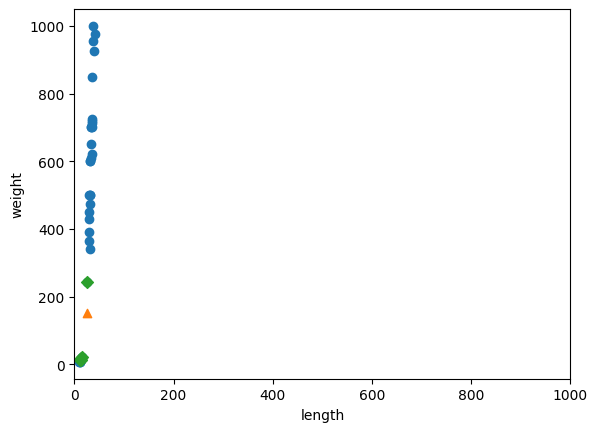

In [35]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')

In [36]:
mean = np.mean(train_input, axis=0) #평균 계산
std = np.std(train_input, axis = 0) #표준편차 계산

train_scaled = (train_input - mean) / std #표준점수 z-점수를 구한다.
print(mean)
print(std)

print(train_scaled)

[ 27.29722222 454.09722222]
[  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]

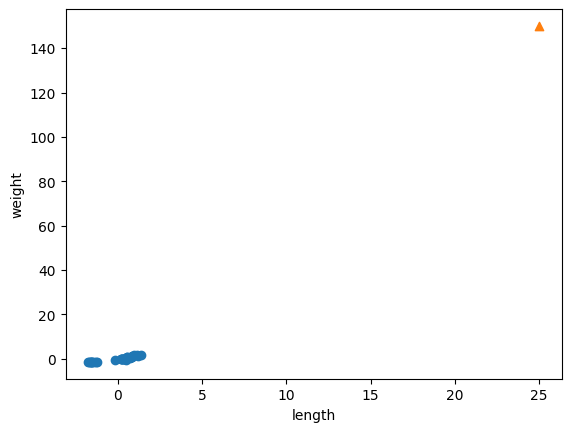

In [37]:
a = [25,150]

#수상한 데이터를 집어넣으니 그래프가 이상하게 나온다 왜냐하면 train값들은 스케일링 시켰는데 수상한 데이터는 안했기 때문이다.

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(a[0],a[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

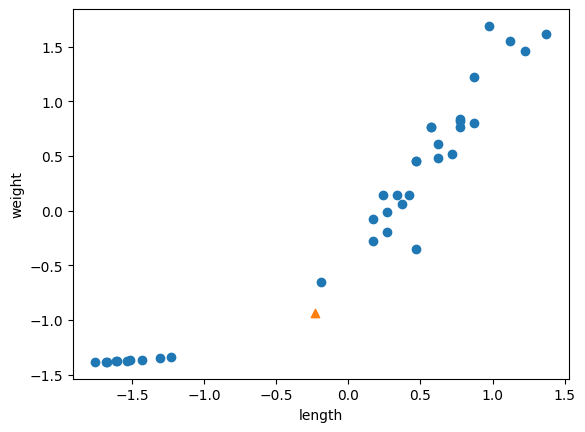

In [38]:
a = [25,150]

new = (a-mean)/std #아까 수상한 그 데이터도 스케일링을 시켜준다.
#잘 되는 모습
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[1.]


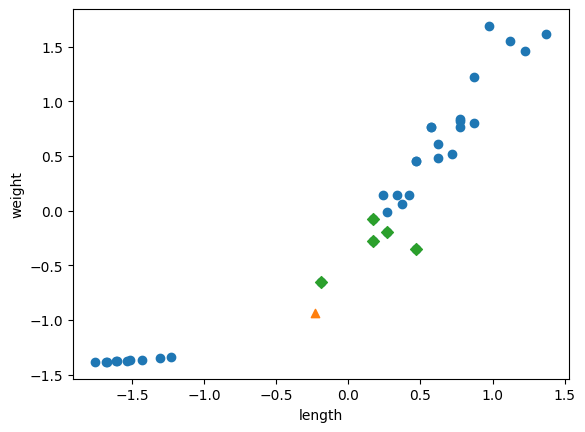

In [39]:
kn.fit(train_scaled,train_target) #스케일링된 데이터로 모델생성

test_scaled = (test_input - mean) /std #스케일링된 데이터로 모델을 생성했으니 test데이터도 데이터 스케일링을 진행해야함

kn.score(test_scaled, test_target) # 1.0  출력 100%정답

print(kn.predict([new])) # 그 수상한 데이터의 스케일링된 버전을 테스트해보니 드디어 1이 뜬다.

distances, indexes = kn.kneighbors([new]) #가장 가까운 5개의 데이터의 거리와 인덱스를 반환한다.

plt.scatter(train_scaled[:,0],train_scaled[:,1]) # x = 0번째 열 y = 1번째 열
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker = 'D') #가장 가까운 인덱스 5개를 그래프에 표시함 D로
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #이제 정상작동이 된다.

In [40]:
import numpy as np #예시 코드

#표준편차 = 표준편차는 데이터의 분포가 얼마나 퍼져 있는지를 나타내는 측정 지표입니다.
#표준편차는 데이터의 각 데이터 포인트가 평균으로부터 얼마나 떨어져 있는지의 절대적인 측정을 제공합니다.

# 5개 과목의 시험 점수 데이터
scores = np.array([80, 85, 90, 95, 100])

# 평균 계산
mean = np.mean(scores)

# 분산 계산
variance = np.var(scores)

std_deviation = np.std(scores)   #평균에서 얼마나 평균적으로 떨어져있나.
# 각 과목의 표준점수 계산
z_scores = (scores - mean) / std_deviation

print("평균:", mean)
print("분산:", variance)
print("표준편차:", std_deviation)
print("표준점수:", z_scores)


평균: 90.0
분산: 50.0
표준편차: 7.0710678118654755
표준점수: [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
